In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [111]:
'''
load trip data 
'''
raw_trip_data_df = pd.read_csv('./trip_data_4.csv')
print(list(raw_trip_data_df.columns))

c:\program files\python36\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


['medallion', ' hack_license', ' vendor_id', ' rate_code', ' store_and_fwd_flag', ' pickup_datetime', ' dropoff_datetime', ' passenger_count', ' trip_time_in_secs', ' trip_distance', ' pickup_longitude', ' pickup_latitude', ' dropoff_longitude', ' dropoff_latitude']


In [112]:
'''
load trip fare 
'''
raw_trip_fare_df = pd.read_csv('./trip_fare_4.csv')
print(list(raw_trip_fare_df.columns))

['medallion', ' hack_license', ' vendor_id', ' pickup_datetime', ' payment_type', ' fare_amount', ' surcharge', ' mta_tax', ' tip_amount', ' tolls_amount', ' total_amount']


### Probe data sets
#### trip_data_csv
- store_and_fwd_flag has 7518657 null values
- dropoff_longitude and dropoff_latitude have 146 null values
- the number of trips increase from Monday to Friday and drop on Saturday and Sunday regularly and seasonally


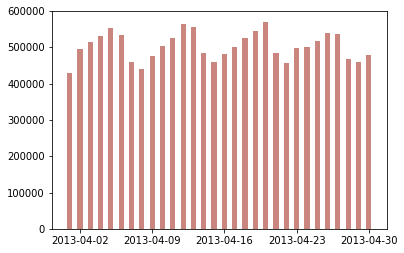

In [113]:
'''
Histogram of pickup date  
'''

raw_trip_data_df[' pickup_datetime'] = pd.to_datetime(raw_trip_data_df[' pickup_datetime'])
raw_trip_data_df[' dropoff_datetime'] = pd.to_datetime(raw_trip_data_df[' dropoff_datetime'])
raw_trip_data_df[' pickup_date'] = raw_trip_data_df[' pickup_datetime'].dt.date
raw_trip_data_df[' dropoff_date'] = raw_trip_data_df[' dropoff_datetime'].dt.date
trip_data_pickup_date_count = raw_trip_data_df.groupby(' pickup_date').size().reset_index(name='count')

bar_width = 0.5
opactiy = 0.5
plt.bar(trip_data_pickup_date_count[' pickup_date'], trip_data_pickup_date_count['count'], bar_width, alpha=opactiy, color='#990C01')
plt.show()

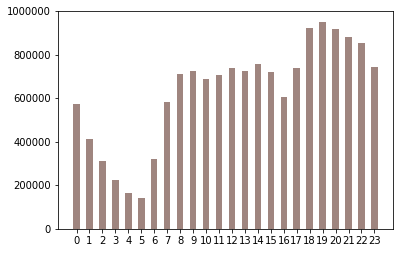

In [114]:
'''
Histogram of pickup hour
'''

raw_trip_data_df[' pickup_hour'] = raw_trip_data_df[' pickup_datetime'].dt.hour
raw_trip_data_df[' dropoff_hour'] = raw_trip_data_df[' dropoff_datetime'].dt.hour
trip_data_pickup_hour_count = raw_trip_data_df.groupby(' pickup_hour').size().reset_index(name='count')

plt.bar(trip_data_pickup_hour_count[' pickup_hour'], trip_data_pickup_hour_count['count'], bar_width, alpha=opactiy, color='#400C01')
x_trick = plt.xticks(np.arange(0, 24, 1))
plt.show()

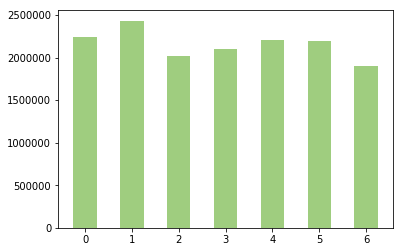

In [115]:
'''
Histogram of pickup day
'''

raw_trip_data_df[' pickup_dayofweek'] = raw_trip_data_df[' pickup_datetime'].dt.dayofweek
raw_trip_data_df[' dropoff_dayofweek'] = raw_trip_data_df[' dropoff_datetime'].dt.dayofweek
trip_data_pickup_day_count = raw_trip_data_df.groupby(' pickup_dayofweek').size().reset_index(name='count')

plt.bar(trip_data_pickup_day_count[' pickup_dayofweek'], trip_data_pickup_day_count['count'], bar_width, alpha=opactiy, color='#409C01')
x_trick = plt.xticks(np.arange(0, 7, 1))
plt.show()

In [116]:
raw_trip_data_df[' tip_time_percentage'] = raw_trip_fare_df[' tip_amount'] / raw_trip_data_df[' trip_time_in_secs']
raw_trip_data_df[' tip_distance_percentage'] = raw_trip_fare_df[' tip_amount'] / raw_trip_data_df[' trip_distance']
raw_trip_data_df[' speed'] = raw_trip_data_df[' trip_distance'] / raw_trip_data_df[' trip_time_in_secs']

### data clean
- remove rows which contains null values from 'dropoff_longitude/dropoff_latitude' in trip data csv file
- restrict the location/GPS 
- remove the records with unreasonable number of passengers

In [117]:
trip_data_df = raw_trip_data_df[raw_trip_data_df[' dropoff_longitude'].notnull()]
trip_data_df = trip_data_df.loc[(trip_data_df[' pickup_longitude'] > -75) & (trip_data_df[' pickup_longitude'] < -73)
                                   & (trip_data_df[' pickup_latitude'] > 39) & (trip_data_df[' pickup_latitude'] < 42)
                               & (trip_data_df[' passenger_count'] > 0) & (trip_data_df[' passenger_count'] < 7) ]


trip_fare_df = raw_trip_fare_df


del raw_trip_data_df
del raw_trip_fare_df


    passenger_count       sum
0                 1  10515957
1                 2   1954768
2                 3    601162
3                 4    293728
4                 5    879733
5                 6    600446


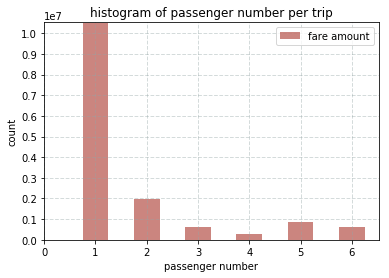

In [151]:
'''
Question: What is the distribution of number of passengers per trip?
'''
passenger_number_bins = trip_data_df.groupby(' passenger_count').size().reset_index(name="sum")
print(passenger_number_bins)

fig, ax = plt.subplots()
bins = np.arange(max(passenger_number_bins[' passenger_count'].tolist()))
counts = np.arange(max(passenger_number_bins['sum'].tolist()))
max_bin = max(bins)
min_bin = min(bins)
bar_width = 0.5
opactiy = 0.5

plt.bar(passenger_number_bins[' passenger_count'], passenger_number_bins['sum'], bar_width, alpha=opactiy, color='#990C01', label='passenger number')
plt.xlabel('passenger number')
plt.ylabel('count')
plt.title('histogram of passenger number per trip')
x_trick = plt.xticks(np.arange(min_bin, max_bin+2, 1.0))
y_trick = plt.yticks(np.arange(min(counts), max(counts)+1, 1000000))
plt.grid(color='#95a5a6',linestyle='--', linewidth=1,axis='both',alpha=0.4)
plt.ylim(0,max(counts)+10000)
plt.legend(['passenger number count'])
plt.show()

   payment_type      sum
0           CRD  8105470
1           CSH  6943669
2           DIS    11552
3           NOC    33595
4           UNK     6182


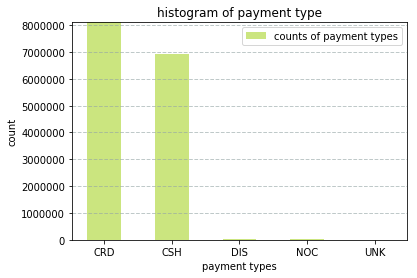

In [119]:
'''
Question: What is the distribution of payment type?
'''

payment_types_count = trip_fare_df.groupby(' payment_type').size().reset_index(name="sum")
print(payment_types_count)

fig, ax = plt.subplots()
counts = np.arange(max(payment_types_count['sum'].tolist()))
bar_width = 0.5
opactiy = 0.5

plt.bar(np.arange(len(payment_types_count[' payment_type'].tolist())), payment_types_count['sum'], bar_width, alpha=opactiy, color='#99CC01')
plt.xlabel('payment types')
plt.ylabel('count')
plt.title('histogram of payment type')
x_trick = plt.xticks(range(len(payment_types_count[' payment_type'].tolist())), payment_types_count[' payment_type'])
plt.legend(['counts of payment types'])
plt.ylim(0,max(counts)+1)
plt.grid(color='#95a5a6',linestyle='--', linewidth=1,axis='y',alpha=0.6)
plt.show()

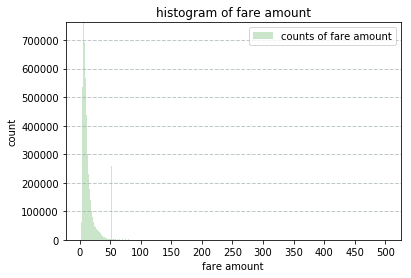

      fare_amount     sum
65            6.5  762125
56            6.0  754952
73            7.0  745167
46            5.5  728411
77            7.5  724808
86            8.0  692786
36            5.0  657388
96            8.5  655520
103           9.0  609175
109           9.5  566348
29            4.5  535042
116          10.0  520414
123          10.5  478170
131          11.0  436019
142          11.5  398074
22            4.0  364794
146          12.0  363782
153          12.5  330203
159          13.0  301000
166          13.5  274444
553          52.0  257045
173          14.0  250688
179          14.5  230013
184          15.0  209171
190          15.5  192049
13            3.5  185119
196          16.0  176565
202          16.5  162691
207          17.0  150063
213          17.5  138007
217          18.0  127645
221          18.5  117245
227          19.0  107914
231          19.5  100829
236          20.0   94448
244          20.5   85623
249          21.0   78641
254         

In [120]:
'''
Question: What is the distribution of fare amount?
'''

fare_amount_count = trip_fare_df[trip_fare_df[' fare_amount'] > 0].groupby(' fare_amount').size().reset_index(name="sum")
fare_amount = fare_amount_count[' fare_amount']

fig, ax = plt.subplots()
bins = np.arange(max(fare_amount_count[' fare_amount'].tolist()))
counts = np.arange(max(fare_amount_count['sum'].tolist()))
bar_width = 0.5
opactiy = 0.5

plt.bar(fare_amount_count[' fare_amount'], fare_amount_count['sum'], bar_width, alpha=opactiy, color='#99CC99')
plt.xlabel('fare amount')
plt.ylabel('count')
plt.title('histogram of fare amount')
x_trick = plt.xticks(np.arange(min(bins), max(bins)+10, 50.0))
plt.legend(['counts of fare amount'])
plt.ylim(0,max(counts)+1)
plt.grid(color='#95a5a6',linestyle='--', linewidth=1,axis='y',alpha=0.6)

plt.show()

print(fare_amount_count.sort_values(by=['sum'], ascending=False).head(50))


      tip_amount      sum
99           1.0  1366843
199          2.0   746506
149          1.5   594979
299          3.0   255341
249          2.5   209655
179          1.8   186461
159          1.6   174721
139          1.4   172514
169          1.7   166907
119          1.2   166170
129          1.3   164163
209          2.1   159592
189          1.9   155435
109          1.1   134404
219          2.2   128887
239          2.4   120638
229          2.3   115241
399          4.0    98440
492          5.0    97637
269          2.7    95288


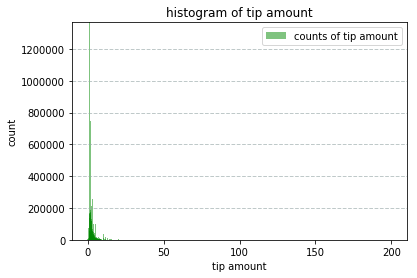

In [121]:
'''
Question: What is the distribution of tip amount?
'''

tip_amount_count = trip_fare_df[trip_fare_df[' tip_amount'] > 0].groupby(' tip_amount').size().reset_index(name="sum")
print(tip_amount_count.sort_values(by='sum', ascending=False).head(20))

fig, ax = plt.subplots()
bins = np.arange(max(tip_amount_count[' tip_amount'].tolist()))
counts = np.arange(max(tip_amount_count['sum'].tolist()))
bar_width = 0.5
opactiy = 0.5

plt.bar(tip_amount_count[' tip_amount'], tip_amount_count['sum'], bar_width, alpha=opactiy, color='#008801')
plt.xlabel('tip amount')
plt.ylabel('count')
plt.title('histogram of tip amount')
x_trick = plt.xticks(np.arange(min(bins), max(bins)+10, 50.0))
plt.legend(['counts of tip amount'])
plt.ylim(0,max(counts)+1)
plt.grid(color='#95a5a6',linestyle='--', linewidth=1,axis='y',alpha=0.6)
plt.show()

       total_amount     sum
510             9.0  542147
413             8.0  515787
264             6.5  514941
314             7.0  503132
364             7.5  497577
560             9.5  491689
461             8.5  463910
214             6.0  463447
610            10.0  431443
660            10.5  373910
809            12.0  364666
168             5.5  360053
709            11.0  340526
858            12.5  339005
759            11.5  297228
122             5.0  276608
907            13.0  267068
1107           15.0  238671
957            13.5  216880
1156           15.5  205579


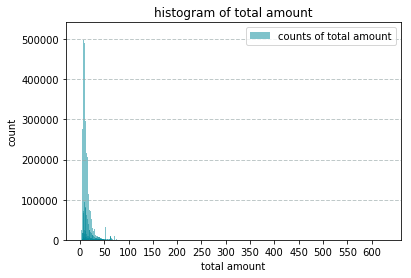

In [122]:
'''
Question: What is the distribution of total amount?
'''

total_amount_count = trip_fare_df[trip_fare_df[' total_amount'] > 0].groupby(' total_amount').size().reset_index(name="sum")
print(total_amount_count.sort_values(by='sum', ascending=False).head(20))

fig, ax = plt.subplots()
bins = np.arange(max(total_amount_count[' total_amount'].tolist()))
counts = np.arange(max(total_amount_count['sum'].tolist()))
bar_width = 0.5
opactiy = 0.5

plt.bar(total_amount_count[' total_amount'], total_amount_count['sum'], bar_width, alpha=opactiy, color='#008899')
plt.xlabel('total amount')
plt.ylabel('count')
plt.title('histogram of total amount')
x_trick = plt.xticks(np.arange(min(bins), max(bins)+10, 50.0))
plt.legend(['counts of total amount'])
plt.ylim(0,max(counts)+1)
plt.grid(color='#95a5a6',linestyle='--', linewidth=1,axis='y',alpha=0.6)
plt.show()

In [123]:
'''
Question: What are top 5 busiest hours of the day?
'''
top_five_businest_hours = trip_data_pickup_hour_count.sort_values('count', ascending = False).head(5)['count']
print(top_five_businest_hours)

19    950590
18    922177
20    917030
21    881281
22    852428
Name: count, dtype: int64


In [54]:
'''
Question: What are the top 10 busiest locations of the city?
'''
from sklearn.cluster import KMeans
import collections

trip_data_pickup_location = trip_data_df[[' pickup_longitude',' pickup_latitude']]
trip_data_dropoff_location = trip_data_df[[' dropoff_longitude',' dropoff_latitude']]

init = np.array([[ -73.98737616,   40.72981533],
       [ -73.78423222,   40.64711269],
       [ -73.9546417 ,   40.77377538],
       [ -66.84140269,   36.64537175],
       [ -73.87040541,   40.77016484],
       [ -76.99779701,   38.47370625],
       [ -73.96975298,   40.69089596],
       [ -74.00816622,   40.71414939],
       [ -66.97216034,   44.37194443],
       [ -61.33552933,   37.85105133],
       [ -73.98001393,   40.7783577 ],
       [ -72.00626526,   43.20296402],
       [ -73.07618713,   35.03469086],
       [ -79.20167796,   41.04752096],
       [ -74.00106031,   40.73867723]])
kmeans_pickup = KMeans(n_clusters=15, init=init, n_init=1)
kmeans_pickup.fit(trip_data_pickup_location)

print(kmeans_pickup.cluster_centers_)
print(collections.Counter(kmeans_pickup.labels_))

[[-73.98586082  40.73560053]
 [-73.78528186  40.64676752]
 [-73.95836365  40.78291025]
 [-74.56063801  40.43221587]
 [-73.87352844  40.76843605]
 [-74.15025426  41.40726659]
 [-73.97182165  40.69698248]
 [-74.00346359  40.72097811]
 [-74.16246798  40.53884501]
 [-74.0255909   40.85681094]
 [-73.97609587  40.7618282 ]
 [-73.42722649  40.71114713]
 [-74.22646583  40.73834004]
 [-73.77293769  40.9462311 ]
 [-73.99531452  40.74939391]]
Counter({10: 4315971, 2: 2737815, 14: 2579179, 0: 2299162, 7: 1901857, 4: 388169, 6: 366235, 1: 250143, 9: 2215, 12: 2022, 13: 1608, 8: 637, 11: 586, 3: 108, 5: 87})


In [55]:
kmeans_pickup.cluster_centers_.shape
print(collections.Counter(kmeans_pickup.labels_).most_common(10))
top_10 = kmeans_pickup.cluster_centers_[[10, 2, 14, 0, 7, 4, 6, 1, 9, 12], :]
print(top_10)

[(10, 4315971), (2, 2737815), (14, 2579179), (0, 2299162), (7, 1901857), (4, 388169), (6, 366235), (1, 250143), (9, 2215), (12, 2022)]
[[-73.97609587  40.7618282 ]
 [-73.95836365  40.78291025]
 [-73.99531452  40.74939391]
 [-73.98586082  40.73560053]
 [-74.00346359  40.72097811]
 [-73.87352844  40.76843605]
 [-73.97182165  40.69698248]
 [-73.78528186  40.64676752]
 [-74.0255909   40.85681094]
 [-74.22646583  40.73834004]]


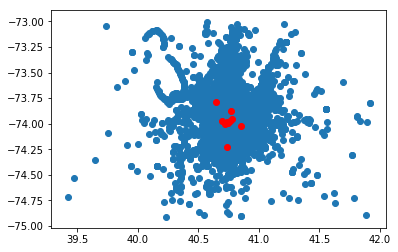

In [56]:
plt.scatter(trip_data_pickup_location[' pickup_latitude'], trip_data_pickup_location[' pickup_longitude'])
plt.scatter(top_10[:, 1], top_10[:,0], color='red')
plt.show()

                 rate_code   passenger_count   trip_time_in_secs  \
 trip_distance                                                     
57.00             0.707107          0.707107         6423.358000   
45.46             0.000000          2.828427         6024.549776   
44.70             0.707107          0.000000         5808.882207   
56.00             0.707107          1.414214         5704.937511   
54.90             0.707107          0.000000         4838.731704   

                 pickup_longitude   pickup_latitude   dropoff_longitude  \
 trip_distance                                                            
57.00                    0.119457          0.095415            0.020527   
45.46                    0.102879          0.018280            0.007089   
44.70                    0.153120          0.061651            0.122435   
56.00                    0.000081          0.000046            0.001014   
54.90                    0.124070          0.047955            0.019389  

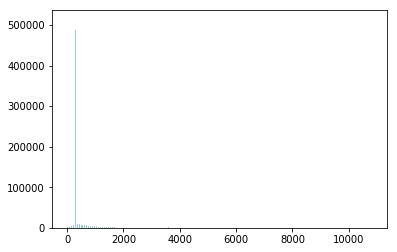

In [100]:
'''
Which trip has the highest standard deviation of travel time?
'''
trip_data_trip_time = raw_trip_data_df.groupby(' trip_time_in_secs').size().reset_index(name='count')
trip_data_trip_time_std = raw_trip_data_df.groupby(' trip_distance').std()

# print(trip_data_trip_time_std)

print(trip_data_trip_time_std.sort_values(by=[' trip_time_in_secs'], ascending= False).head(5))
plt.bar(trip_data_trip_time[' trip_time_in_secs'], trip_data_trip_time['count'], bar_width, alpha=opactiy, color='#409C99')
plt.show()


In [126]:
'''
Can we build a model to predict fare and trip amount given pick up and drop off coordinates, time of day and week?
'''
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

rf = RandomForestRegressor(max_depth=20, random_state=0)

# select first 1000 rows to save memeory
left = trip_data_df[0:1000]
right = trip_fare_df[0:1000]

enrich_data = pd.DataFrame.merge(left, right, how='inner', on=['medallion', ' hack_license', ' vendor_id'])

train_input = enrich_data[[' pickup_latitude', ' pickup_longitude', ' dropoff_latitude', ' dropoff_longitude', ' pickup_dayofweek', ' dropoff_dayofweek']]
train_output = enrich_data[[' fare_amount', ' tip_amount']]

rf.fit(train_input, train_output)

test_data = pd.DataFrame.merge(trip_data_df[1000: 2000], trip_fare_df[1000: 2000], how='inner', on=['medallion', ' hack_license', ' vendor_id'])
test_input = test_data[[' pickup_latitude', ' pickup_longitude', ' dropoff_latitude', ' dropoff_longitude', ' pickup_dayofweek', ' dropoff_dayofweek']]
test_output = test_data[[' fare_amount', ' tip_amount']]

predicted = rf.predict(test_input)
print(predicted)


[[ 11.04075835   1.98027838]
 [ 11.04075835   1.98027838]
 [ 22.5          4.174     ]
 ..., 
 [  5.87736362   0.55082446]
 [  7.55532581   0.99343406]
 [ 10.19166667   1.9215    ]]


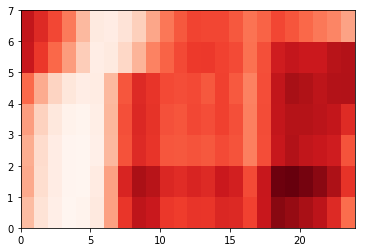

In [144]:
'''
If you were a taxi owner, how would you maximize your earning in a day?
'''

trip_fare_df[' pickup_datetime'] = pd.to_datetime(trip_fare_df[' pickup_datetime'])
trip_fare_df[' pickup_hour'] = trip_fare_df[' pickup_datetime'].dt.hour
trip_fare_df[' pickup_dayofweek'] = trip_fare_df[' pickup_datetime'].dt.dayofweek

trip_fare_day_hour = trip_fare_df.groupby([' pickup_dayofweek', ' pickup_hour'])[' tip_amount'].count()

data = trip_fare_day_hour.values
reshaped_data = data.reshape(7, 24)

rows = trip_fare_df[' pickup_hour'].unique()
columns = trip_fare_df[' pickup_dayofweek'].unique()

plt.pcolor(reshaped_data, cmap=plt.cm.Reds)
plt.show()



     pickup_hour          sum
0              0   7372231.50
1              1   5257068.87
2              2   3917909.60
3              3   2922944.25
4              4   2429818.18
5              5   2331666.92
6              6   4046492.20
7              7   6840198.27
8              8   8333660.12
9              9   8523623.79
10            10   8144980.66
11            11   8483297.99
12            12   8902489.60
13            13   9115978.70
14            14   9736955.40
15            15   9401569.15
16            16   7783004.84
17            17   9192214.12
18            18  10885819.53
19            19  10773647.03
20            20  10641611.46
21            21  10472548.05
22            22  10406429.46
23            23   9429609.97


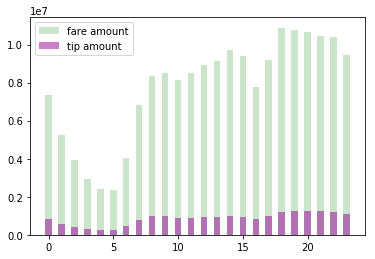

In [153]:
'''
If you run a taxi company with 10 taxis, how would you maximize your earnings?
'''

trip_fare_hour_amount = trip_fare_df.groupby(' pickup_hour')[' fare_amount'].sum().reset_index(name='sum')

print(trip_fare_hour_amount)

plt.bar(trip_fare_hour_amount[' pickup_hour'], trip_fare_hour_amount['sum'], bar_width, alpha=opactiy, color='#99CC99')


trip_tip_hour_amount = trip_fare_df.groupby(' pickup_hour')[' tip_amount'].sum().reset_index(name='sum')
plt.bar(trip_tip_hour_amount[' pickup_hour'], trip_tip_hour_amount['sum'], bar_width, alpha=opactiy, color='#990099')
plt.legend(['fare amount', 'tip amount'])
plt.show()